# Histograma de Goles del mundial de Catar 2022.
##Erick Eduardo Orozco Reyes A01198247


El proceso seleccionado ya contaba con un dataset sacado de internet, el cual nos muestra las estadisticas de todos los partidos que hubo en el mundial de futbol de Catar 2022. Para poder realizar la actividad solo nos centraremos en los goles marcados por partido, para poder comprender mejor los modelos.

#### 1.- Importamos la librerías que usaremos:

In [ ]:

!pip install fitter seaborn

In [ ]:
!pip install --force-reinstall numpy==1.23.5
!pip install --upgrade --force-reinstall fitter

In [ ]:
!pip install scipy

### 2.- Cargamos el Documento y comenzamos a graficar con los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


archivo = "Fifa Worldcup 2022.csv"
df = pd.read_csv(archivo)

df.head()


,Sl. No,Match No.,Team,Against,Group,Goal,Possession (%),Inside Penalty Area,Outside Penalty Area,Assists,...,Fouls Against,Offsides,Passes,Passes Completed,Crosses,Crosses Completed,Corners,Free Kicks,Penalties Scored,Pts
0,1,1,Qatar,Ecuador,A,0,40,0,0,0,...,15,3,453,387,10,5,1,19,0,0
1,2,1,Ecuador,Qatar,A,2,46,2,0,1,...,15,4,484,419,26,10,3,17,1,3
2,3,2,England,Iran,B,6,69,6,0,6,...,9,2,810,733,29,9,8,16,0,3
3,4,2,Iran,England,B,2,20,2,0,1,...,14,2,232,156,11,3,0,10,1,0
4,5,3,Senegal,Netherlands,A,0,39,0,0,0,...,13,2,391,326,22,8,6,14,0,0


In [2]:
# Nos enfocamos en la columna de goles
data = df["Goal"].dropna().values

# Mostrar estadísticos básicos
print("Media de goles:", np.mean(data))
print("Máximo de goles:", np.max(data))
print("Mínimo de goles:", np.min(data))

Media de goles: 1.34375
Máximo de goles: 7
Mínimo de goles: 0


In [6]:
# Definir algunas distribuciones comunes para datos discretos/positivos
distributions = [
    stats.norm, stats.expon, stats.gamma, stats.beta, stats.lognorm
]

# Inicializar variables para encontrar la mejor
best_fit = None
best_error = np.inf
best_distribution = None

# Crear histograma para comparación
hist_values, bin_edges = np.histogram(data, bins=range(int(np.min(data)), int(np.max(data)) + 2), density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

for distribution in distributions:
    try:
        params = distribution.fit(data)
        pdf_fitted = distribution.pdf(bin_centers, *params)
        mse = np.mean((pdf_fitted - hist_values) ** 2)
        print(f"{distribution.name}: MSE = {mse}")

        if mse < best_error:
            best_error = mse
            best_fit = params
            best_distribution = distribution
    except Exception as e:
        print(f"Error con {distribution.name}: {e}")


mu, sigma = stats.norm.fit(data)
print(f"Media (mu): {mu}")
print(f"Desviación estándar (sigma): {sigma}")

norm: MSE = 0.0007940969505181788
expon: MSE = 0.00744218818554791
gamma: MSE = 0.011719114749396816
beta: MSE = 0.014175381861721115
lognorm: MSE = 0.03132009808678068
Media (mu): 1.34375
Desviación estándar (sigma): 1.3371933059584167


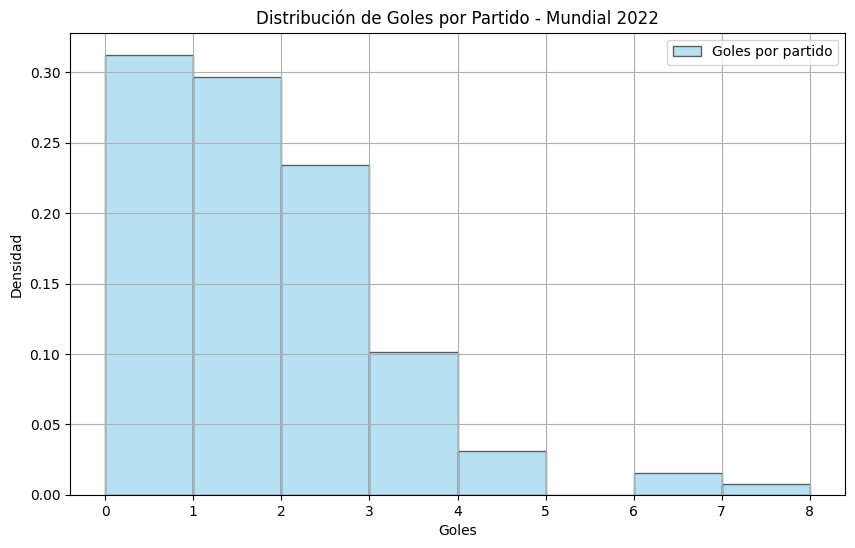

In [10]:
# Crear histograma
plt.figure(figsize=(10, 6))
plt.hist(data, bins=range(int(np.min(data)), int(np.max(data)) + 2),
         density=True, alpha=0.6, color='skyblue', edgecolor='black', label="Goles por partido")

# Etiquetas y título
plt.title("Distribución de Goles por Partido - Mundial 2022")
plt.xlabel("Goles")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()

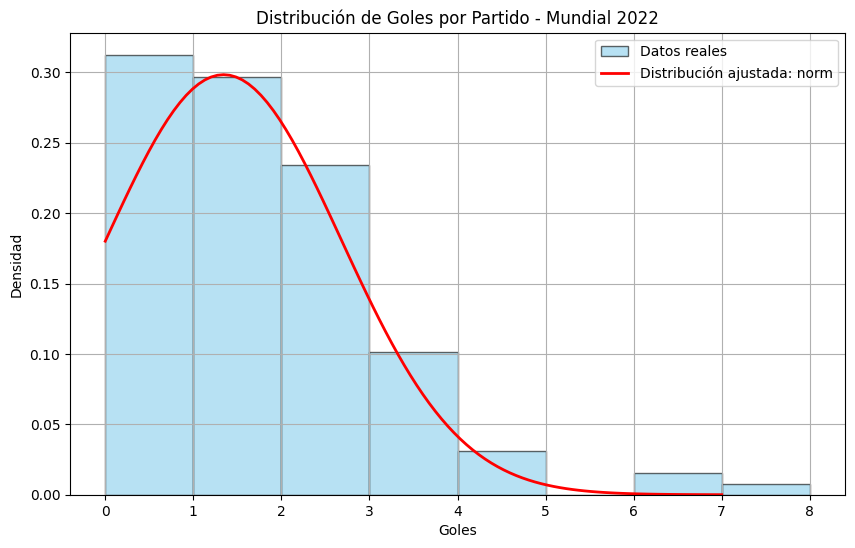

In [4]:
# Graficar el histograma de los goles
plt.figure(figsize=(10, 6))
plt.hist(data, bins=range(int(np.min(data)), int(np.max(data)) + 2), density=True, alpha=0.6,
         color='skyblue', edgecolor='black', label="Datos reales")

# Graficar la mejor distribución ajustada
x = np.linspace(np.min(data), np.max(data), 100)
pdf = best_distribution.pdf(x, *best_fit)
plt.plot(x, pdf, 'r-', linewidth=2, label=f"Distribución ajustada: {best_distribution.name}")

plt.title("Distribución de Goles por Partido - Mundial 2022")
plt.xlabel("Goles")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()


# Reflexión

Como pudimos observar, el codigo encontro que la sitribución normal fue la que tuvo el MSE mas bajo, lo cual es el mejor que se ajusta a nuestros datos reales.

## ¿Cuáles son los parámetros de la distribución?
Fueron dos, la media que se refiere al promedio de goles por partido y la desviación estandar que expone que tanto vare los goles respecto al promedio.

In [8]:
mu, sigma = stats.norm.fit(data)
print(f"Media (mu): {mu}")
print(f"Desviación estándar (sigma): {sigma}")


Media (mu): 1.34375
Desviación estándar (sigma): 1.3371933059584167


# ¿Cómo podrías utilizar el modelo creado?

Pueden haber varios usos, como el de predecir probabilidades de que un partido tenga más de 3 goles, además de evaluarsi hay cambios en el tiempo, en este caso podemos saber si los partidos se vuelven más ofensivos o defensivos con forme pasa el tiempo. Tambien puede ayudar generar datos sintéticos que se apeguen al la realidad para un sin fin de usos.

Un ejemplo claro es las casas de apuestas, hacen uso de modelos como estos para poder fijar sus cuotas y reducir sus riesgos, solo que ellos usan modelos más precisos que este.

# ¿Puedes usar distribuciones de probabilidad para identificar similitudes entre varios procesos?

Si, se puede para poder comparar diferentes torneos o ligas de futbol, o tambien entre diferentes deportes pueden ser usados estas distribuciones de probabilidades, es un sin fin de usos, se podría decir que estos modelos nos rodean.